**Machine Learning Project on Used Bike Price Prediction** 

**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Used_bikes')  #Reading the excel file

In [ ]:
df  #Displaying the dataframe

,Model,City,Kms_driven,Owner,Age,Power_CC,Brand,Price
0,Yamaha Fazer 25 250cc,24 Pargana,5100,Second Owner,4,250,Yamaha,80400
1,KTM Duke 250cc,24 Pargana,2800,First Owner,2,250,KTM,170000
2,Yamaha FZS FI 150cc,24 Pargana,23000,First Owner,5,150,Yamaha,65000
3,Honda CB Trigger 150cc,24 Pargana,24000,Second Owner,7,150,Honda,36000
4,Yamaha FZS FI 150cc,24 Pargana,23000,First Owner,5,150,Yamaha,65000
...,...,...,...,...,...,...,...,...
32643,Hero Passion Pro 100cc,Wardha,10883,First Owner,5,100,Hero,42000
32644,Bajaj Avenger Cruise 220,Yamuna Nagar,5200,Second Owner,4,220,Bajaj,70000
32645,Bajaj Pulsar 180cc,Yamuna Nagar,16000,First Owner,11,180,Bajaj,30000
32646,Yamaha YZF-R15 150cc,Yemmiganur,36000,First Owner,9,150,Yamaha,47000


**EDA & Preprocessing**

In [ ]:
df.shape  #Displaying the shape

(32648, 8)

In [ ]:
df.drop_duplicates(inplace=True) #Deleting all duplicate rows

In [ ]:
df.shape   #Displaying the dataframe

(7324, 8)

**Handling Missing Values**

In [ ]:
df.isnull().sum()  #Checking if we have null values

Model         0
City          0
Kms_driven    0
Owner         0
Age           0
Power_CC      0
Brand         0
Price         0
dtype: int64

In [ ]:
df.info()    #Checking the datatypes of each column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7324 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Model       7324 non-null   object
 1   City        7324 non-null   object
 2   Kms_driven  7324 non-null   int64 
 3   Owner       7324 non-null   object
 4   Age         7324 non-null   int64 
 5   Power_CC    7324 non-null   int64 
 6   Brand       7324 non-null   object
 7   Price       7324 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 515.0+ KB


Here, Comparing the dtypes of each column with the values above, we understood that out dataframe has no null values and no missing values.

**Removing Outliers**

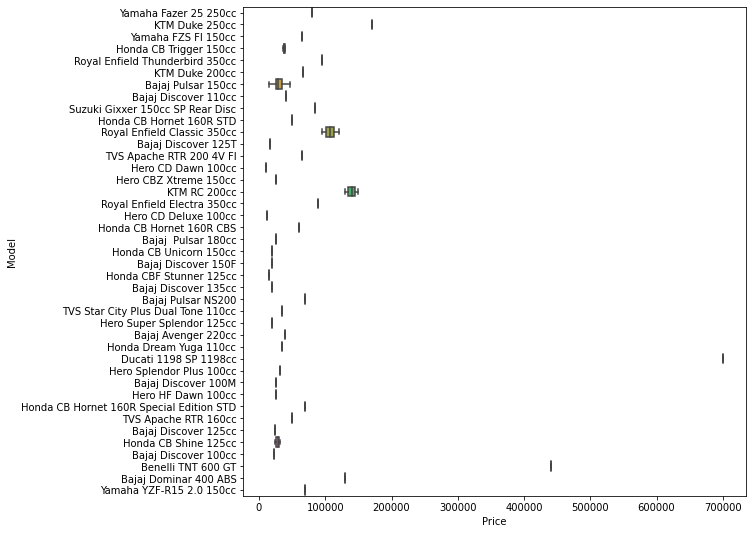

In [ ]:
#Displaying th boxplot
plt.figure(figsize = (9,9))
sns.boxplot(data=df.head(50),x="Price",y="Model")
plt.show()

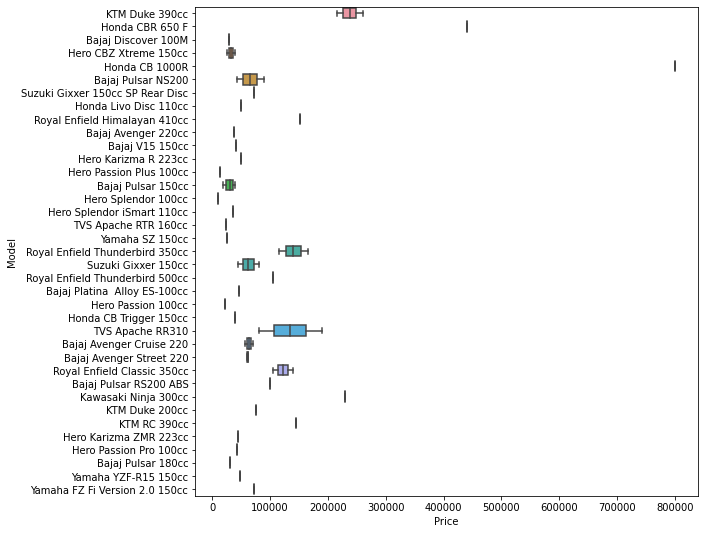

In [ ]:
#Displaying the boxplot
plt.figure(figsize = (9,9))
sns.boxplot(data=df.tail(50),x="Price",y="Model")
plt.show()

By looking at the above figures we can tell that our Dataframe do not have Outliers. 

**Handling Categorical Data**

In [ ]:
df['Owner'].value_counts()  #Checking how many times each value is present in column 'Owner'

First Owner             6642
Second Owner             588
Third Owner               84
Fourth Owner Or More      10
Name: Owner, dtype: int64

We are applying Label Encoding on 'Owner'

In [ ]:
from sklearn.preprocessing import LabelEncoder  #Importing LabelEncoder
le = LabelEncoder() #Creating object

In [ ]:
df.Owner = le.fit_transform(df.Owner) #Performing Label Encoder on Column Owner and updating in dataframe

In [ ]:
df.head()  #Displaying the top 5 rows

,Model,City,Kms_driven,Owner,Age,Power_CC,Brand,Price
0,Yamaha Fazer 25 250cc,24 Pargana,5100,2,4,250,Yamaha,80400
1,KTM Duke 250cc,24 Pargana,2800,0,2,250,KTM,170000
2,Yamaha FZS FI 150cc,24 Pargana,23000,0,5,150,Yamaha,65000
3,Honda CB Trigger 150cc,24 Pargana,24000,2,7,150,Honda,36000
5,Royal Enfield Thunderbird 350cc,24 Pargana,9000,0,6,350,Royal Enfield,95000


**Handling Skewness**

In [ ]:
from scipy.stats import skew  #Imporitng skew

In [ ]:
#Bifurgating data based on their datatypes
df_num = df.select_dtypes('int64','float64')
df_cat = df.select_dtypes(object)

In [ ]:
df_num.head()  #Displaying the top 5 entries 

,Kms_driven,Owner,Age,Power_CC,Price
0,5100,2,4,250,80400
1,2800,0,2,250,170000
2,23000,0,5,150,65000
3,24000,2,7,150,36000
5,9000,0,6,350,95000


Kms_driven
11.702906904911998


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


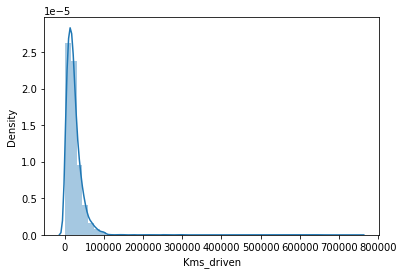

Owner
2.97901298621019


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


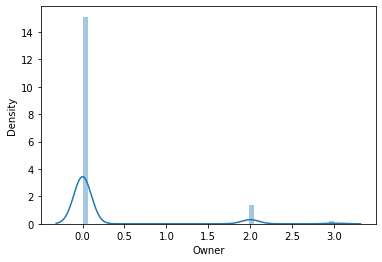

Age
2.6278633195147845


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


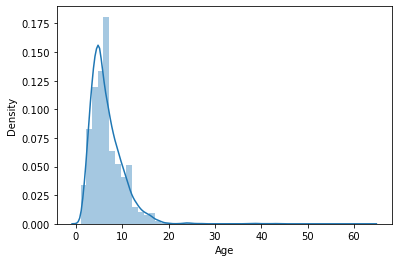

Power_CC
2.614984943540918


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


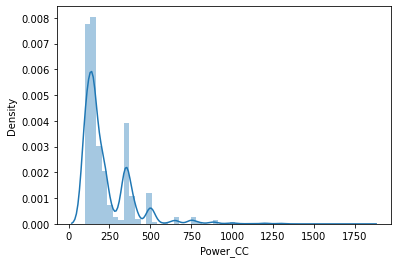

Price
6.2648121613237295


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


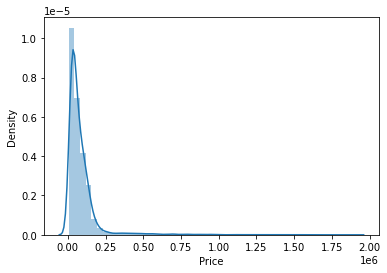

In [ ]:
#Checking the skewness of each column in df_new
for col in df_num:
  print(col)
  print(skew(df_num[col]))

  plt.figure()
  sns.distplot(df_num[col])
  plt.show()

Note that:- 
1. Correlation of any column with target column should be in between -1.0 to 1.0. We say corelation is good.
2. Reduce or remove the Skewness for only those column whose Corelation is not good with the target/output column.

In [ ]:
df_num.corr()  #Checking the corelation of independant columns with target column

,Kms_driven,Owner,Age,Power_CC,Price
Kms_driven,1.000000,0.063173,0.367518,-0.168295,-0.199951
Owner,0.063173,1.000000,0.187229,0.044534,-0.003704
Age,0.367518,0.187229,1.000000,-0.164211,-0.248752
Power_CC,-0.168295,0.044534,-0.164211,1.000000,0.807641
Price,-0.199951,-0.003704,-0.248752,0.807641,1.000000


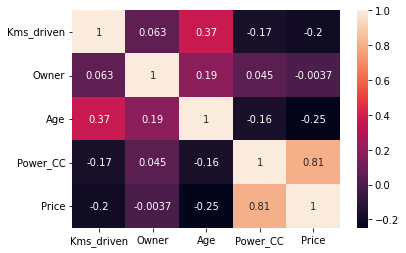

In [ ]:
sns.heatmap(df_num.corr(),annot = True)  #Displaying the coorelation using Heatmap

In [ ]:
df_num["Kms_driven"] = np.sqrt(df_num["Kms_driven"])  #Removing the skewness

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_num["Price"] = np.sqrt(df_num["Price"])  #Removing the skewness

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_num["Power_CC"] = np.sqrt(df_num["Power_CC"])  #Removing the skewness

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Kms_driven
1.6499141643988258


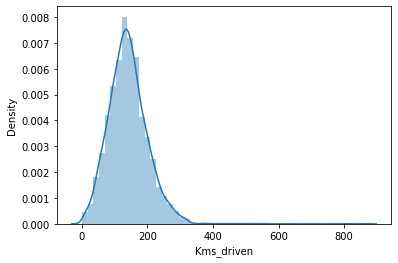

Owner
2.97901298621019


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


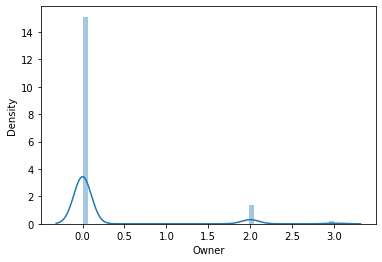

Age
2.6278633195147845


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


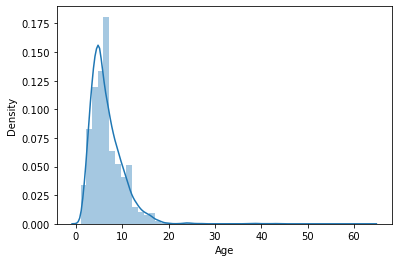

Power_CC
1.4905270111221718


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


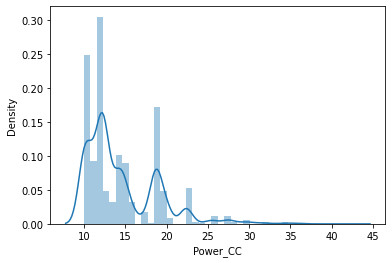

Price
2.6694318347011747


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


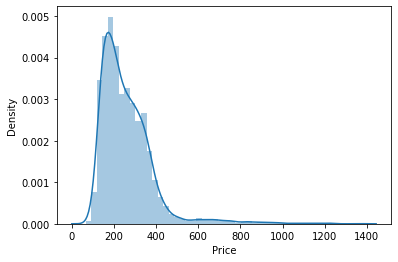

In [ ]:
#Displaying the graph & value of skewness  
for col in df_num:
  print(col)
  print(skew(df_num[col]))

  plt.figure()
  sns.distplot(df_num[col])
  plt.show()

**Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler #importing ScandardScaler

In [ ]:
#Scaling each column using the standard scaler  
for col in df_num:
	ss = StandardScaler()
	df_num[col] = ss.fit_transform(df_num[[col]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [ ]:
df_num.head()  #Displaying the top 5 rows

,Kms_driven,Owner,Age,Power_CC,Price
0,-1.132671,2.898688,-0.736875,0.309658,0.175008
1,-1.430995,-0.315542,-1.291651,0.309658,1.166914
2,0.161357,-0.315542,-0.459486,-0.503498,-0.045294
3,0.213958,2.898688,0.095291,-0.503498,-0.547668
5,-0.754443,-0.315542,-0.182098,0.970620,0.365065


In [ ]:
df_new = pd.concat([df_cat,df_num],axis = 1)   #Concatenation of two dataframe

In [ ]:
df_new.head()  #Displaying the to 5 rows

,Model,City,Brand,Kms_driven,Owner,Age,Power_CC,Price
0,Yamaha Fazer 25 250cc,24 Pargana,Yamaha,-1.132671,2.898688,-0.736875,0.309658,0.175008
1,KTM Duke 250cc,24 Pargana,KTM,-1.430995,-0.315542,-1.291651,0.309658,1.166914
2,Yamaha FZS FI 150cc,24 Pargana,Yamaha,0.161357,-0.315542,-0.459486,-0.503498,-0.045294
3,Honda CB Trigger 150cc,24 Pargana,Honda,0.213958,2.898688,0.095291,-0.503498,-0.547668
5,Royal Enfield Thunderbird 350cc,24 Pargana,Royal Enfield,-0.754443,-0.315542,-0.182098,0.970620,0.365065


Now, above mentioned dataframe is ready for applying any Machine Learning Algorithm

We will be using df_num in order to split for Training and Testing as it has all numeric values.

In [ ]:
from sklearn.linear_model import LinearRegression #Importing Linear Regression
from sklearn.model_selection import train_test_split #Importing Test Train Split
from sklearn.metrics import r2_score #Importing R2_score

In [ ]:
lr = LinearRegression()  #Creating an object

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df_num,df.Price,train_size = 0.8) 

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)  #Training the model

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)
y_pred  #predicting the value based on testing

array([ 24973.51032322,  14632.16159201, -19821.97426235, ...,
        18625.42380768,  98197.72246608,  16122.62321619])

In [ ]:
(r2_score(y_test,y_pred))*100  #Calculation accuracy using R2-score

88.65033355239783

**CONCLUSION**

We have used the Data set of Used Bike and modelled it with a Machine Learning Algorithm so as to preict the Price providing different Parameters.
1. Initially, We import the dataset from drive and made a dataframe of it using pandas.
2. We performed Exploratory Data Analysis (EDA) in order to get rid of all the discrepencies from the dataset.
3. We divided the Data into Testing Data & Training Data then performed Machine Learning Algorithm called as Linear Regression on it. 
4. R2_score defines the accuracy of model which is 88% for our ML-Model.
